In [2]:
# 주식뿐아니라 모든 시계열 데이터에 적용가능
import FinanceDataReader as fdr

stocks = ["TSLA", "AAPL", "NVDA"]

df = fdr.DataReader(stocks).dropna()
df

,TSLA,AAPL,NVDA
2010-06-29,1.592667,7.698981,0.240238
2010-06-30,1.588667,7.559531,0.234048
2010-07-01,1.464000,7.467865,0.237945
2010-07-02,1.280000,7.421582,0.234965
2010-07-06,1.074000,7.472373,0.232444
...,...,...,...
2025-06-26,325.779999,201.000000,155.020004
2025-06-27,323.630005,201.080002,157.750000
2025-06-30,317.660004,205.169998,157.990005
2025-07-01,300.709991,207.820007,153.300003


In [3]:
# 각 종목별 일간 수익률
daily_ret = df.pct_change()
daily_ret

,TSLA,AAPL,NVDA
2010-06-29,NaN,NaN,NaN
2010-06-30,-0.002511,-0.018113,-0.025764
2010-07-01,-0.078473,-0.012126,0.016651
2010-07-02,-0.125683,-0.006198,-0.012524
2010-07-06,-0.160937,0.006844,-0.010732
...,...,...,...
2025-06-26,-0.005404,-0.002778,0.004601
2025-06-27,-0.006600,0.000398,0.017611
2025-06-30,-0.018447,0.020340,0.001521
2025-07-01,-0.053359,0.012916,-0.029685


In [10]:
# 종목별 연간 평균 수익률
annual_ret = daily_ret.mean() * 252
annual_ret

TSLA    0.521155
AAPL    0.261442
NVDA    0.538328
dtype: float64

In [20]:
# 위험(리스크): 변동성이 크다  ->  공분산
import numpy as np

study = [2, 3, 5, 6, 8]
scores = [65, 70,75, 80, 90]

mean_study = np.mean(study)   # 평균 공부시간 
mean_scores = np.mean(scores)

study2 = [i - mean_study for i in study]
scores2 = [i - mean_scores for i in scores]

A = sum([i * j for i, j in zip(study2, scores2)])

# 공분산
result = A / (len(study2) - 1)   # 자유도 빼서 나눠주기
result

22.75

In [28]:
A = np.array([study, scores])
B = np.cov(A)
B

# study와 study, study와 score
# score와 study, score와 score

array([[ 5.7 , 22.75],
       [22.75, 92.5 ]])

In [31]:
var_study = B[0,0]
var_scores = B[1,1]
var = B[0,1]

std_study = np.sqrt(var_study)
std_scores = np.sqrt(var_scores)

corr = B / (std_study * std_scores)
corr
# study와 score의 상관계수: 0.99

array([[0.24823703, 0.99077059],
       [0.99077059, 4.0284079 ]])

In [33]:
# 일간 리스크
daily_cov = daily_ret.cov()
daily_cov

,TSLA,AAPL,NVDA
TSLA,0.001341,0.000242,0.000396
AAPL,0.000242,0.000317,0.000250
NVDA,0.000396,0.000250,0.000842


In [34]:
# 연간 리스크(위험도)
annual_cov = daily_cov * 252
annual_cov

,TSLA,AAPL,NVDA
TSLA,0.337954,0.060861,0.099804
AAPL,0.060861,0.079802,0.063029
NVDA,0.099804,0.063029,0.212301


In [54]:
# 시뮬레이션
import pandas as pd

total = []

for n in range(10000):
    weights = np.random.random(len(stocks))
    weights = weights / np.sum(weights)       # 세 종목에 비중을 랜덤으로 줘서 시뮬레이션 돌림

    returns = np.dot(weights, annual_ret)    # 연간 평균 수익률에 종목의 비중만큼 곱해서 각 경우의 수익 확인
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))
    sharpe_ratio = (returns - 0.03) / risk        # 은행이자 3%일때 샤프지수. 1이상이면 return이 좋은 것
    
    total.append([returns, risk, sharpe_ratio] + list(weights))

df = pd.DataFrame(total, columns = ['Returns', 'Risk', "Sharpe"] + stocks)
df

# 각 비중대로 샀을때 수익률은 이렇고 위험률은 이렇다

,Returns,Risk,Sharpe,TSLA,AAPL,NVDA
0,0.477514,0.438300,1.021021,0.651374,0.179238,0.169388
1,0.402174,0.314216,1.184453,0.088343,0.486251,0.425406
2,0.359842,0.323158,1.020684,0.358378,0.622390,0.019233
3,0.479494,0.404540,1.111124,0.526690,0.179820,0.293490
4,0.531872,0.425764,1.178756,0.165527,0.013049,0.821425
...,...,...,...,...,...,...
9995,0.522796,0.413214,1.192593,0.381887,0.032412,0.585701
9996,0.455131,0.348912,1.218450,0.223538,0.286609,0.489854
9997,0.433978,0.334955,1.206064,0.261826,0.360632,0.377541
9998,0.490119,0.484361,0.949949,0.773591,0.126134,0.100275


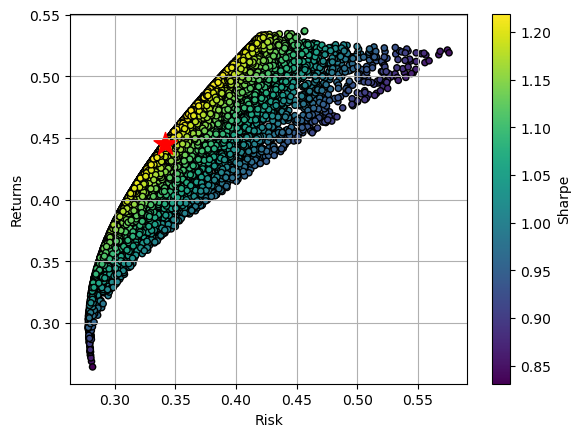

In [55]:
import matplotlib.pyplot as plt

df.plot.scatter(x = "Risk", y = "Returns", grid = True,
                cmap = "viridis", c = "Sharpe", edgecolor = "k")

plt.scatter(x = max_sharpe['Risk'], y = max_sharpe['Returns'],
            c = 'r', marker = '*', s = 300)

plt.show()

# 같은 위험도일때는 수익률이 높은게 좋을거고 (세로선 위)
# 같은 수익률일때는 위험도가 낮은게 좋을것 (가로선 왼)

# 별표쳐진부분이 가장 최적인 부분

In [56]:
max_sharpe = df[df["Sharpe"] == df["Sharpe"].max()]
max_sharpe

# 이 비중으로 맞췄을대가 가장 좋은 것

,Returns,Risk,Sharpe,TSLA,AAPL,NVDA
6923,0.461746,0.354284,1.218644,0.226892,0.262511,0.510597
